## Algoritmo de Maximización de la Esperanza
#### Estudiantes: Dennis Luna Acuña- Graciela Rivera Picado - Luis E. Vargas Porras

### Libraries

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import scipy
from scipy.stats import entropy
from scipy.stats import norm
from torch.distributions import normal
from torch.distributions import multivariate_normal
from scipy import stats 
import seaborn as sns 

### 1. Generate data with Gaussian distribution

*The data are artificially created with a 2-cluster Gaussian distribution with specific means and variances.*

tensor([ 3.7075, -3.6081,  4.3856,  1.6230,  6.5006, 10.1910,  1.4796, -0.6327,
         9.0143, -1.5047,  0.1470,  6.9611,  1.7616,  5.4054,  3.1835, -4.6033,
        -2.3294,  0.8387,  7.9637,  8.5175,  2.1451,  2.4592,  5.6643, 10.2535,
         8.6948,  7.9785,  8.0299,  4.2200,  6.9695, -1.6489, -6.4437,  8.8987,
         5.3562, -7.7197,  3.8449,  5.1855, 13.0195,  6.5047, -6.3746, -2.9532,
         6.1305, -1.9245,  4.2162, -3.0373,  2.9962,  0.1390,  0.7252,  3.7163,
         5.0565,  7.1056,  2.9593, -1.9038,  1.5945, -3.9891, -0.1409, -2.8034,
        -1.5732, -3.7001,  1.5314, -3.5034,  7.5384,  4.8179,  0.3272,  4.1501,
         2.3165,  4.2025, -2.9725, 10.2745, -0.7275,  6.2536,  6.1432,  0.0988,
         1.1786,  7.6157, 13.5970,  4.2823,  1.7894,  6.2708, -0.9408, -4.8332,
         1.6261,  6.5631,  1.8393,  3.5273,  3.0723,  5.0003,  5.8034,  2.6064,
         6.6766,  6.9167, 12.4539,  1.6690,  5.2691,  4.1198, 11.0160,  7.6512,
        -2.1572, 10.1612, -1.6002,  0.22

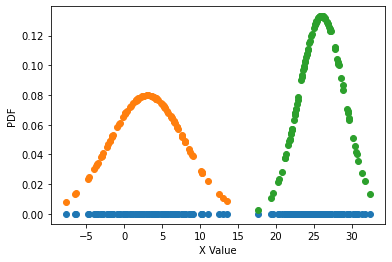

In [25]:
def createDataOneClass(means, std, numberSamplesPerClass):
    normal_dist = torch.distributions.Normal(means,std)
    gaussian_sample = normal_dist.sample((numberSamplesPerClass,1)).squeeze()
    
    return gaussian_sample


def generate_data(numberSamplesPerClass, mean1, mean2 , stds1 , stds2 ):
    """
    Creates the data to be used for training, using a GMM distribution
    @param numberSamplesPerClass, the number of samples per class
    @param mean1, means for samples from the class 1
    @param mean2, means for samples from the class 2
    @param stds1, standard deviation for samples, class 1
    @param stds2, standard deviation for samples, class 2    """

    samplesClass1 = createDataOneClass(mean1, stds1, numberSamplesPerClass)
    samplesClass2 = createDataOneClass(mean2, stds2, numberSamplesPerClass)
    #Concatenates
    samplesAll = torch.cat((samplesClass1, samplesClass2), 0)
    print (samplesAll)

    # Plot Data
    y = np.zeros_like(samplesAll)
    plt.scatter(samplesAll,y)
    #plt.title('Plotting)
    plt.xlabel('X Value')
    plt.ylabel('PDF')

    #Plot densities Functions
    plt.scatter(samplesClass1, norm.pdf(samplesClass1, mean1, stds1))
    plt.scatter(samplesClass2, norm.pdf(samplesClass2, mean2, stds2))      
    
    plt.show()
    
    return (samplesAll, samplesClass1, samplesClass2)

'''
Creates data with gaussian distribution
'''

#Call Function generate Data
X_allSamples, X1_samples, X2_samples = generate_data(numberSamplesPerClass=100, mean1=3.0, mean2=26.0, stds1=5.0, stds2=3.0)



### 2. Create init_random_parameters

In [37]:
def init_random_parameters(K=2, range_mean = [1,10], range_std = [1,5]):
    
    np.random.seed(2)    
    
    mean = torch.randint(range_mean[0],range_mean[1],(K,1))
    std  = torch.randint(range_std[0], range_std[1],(K,1))  
    
    W = torch.cat((mean, std), 1)
    
    return W

#test

W_parameters = init_random_parameters(K=2, range_mean = [1,50], range_std = [1,10])
W_parameters

tensor([[24,  8],
        [ 1,  2]])

### 3. Likelihood Gaussian Observation Function

In [38]:
#Propuesta2Gracielav1
def calculate_likelihood_gaussian_observation(x_n,mu_k,sigma_k):
    
    p_x1 = prob_density = (1/np.sqrt((2.0*np.pi*sigma_k[0]))) * np.exp(-0.5*((x_n- mu_k[0])/sigma_k[0])**2)
    p_x2 = prob_density = (1/np.sqrt((2.0*np.pi*sigma_k[1]))) * np.exp(-0.5*((x_n- mu_k[1])/sigma_k[1])**2) 
    #p_xAll = torch.Tensor([p_x1,p_x2])
    return p_x1,p_x2
    
calculate_likelihood_gaussian_observation(X_allSamples[0],mu_k=[10,20],sigma_k = [1.5,3])

(tensor(4.9152e-05), tensor(9.0749e-08))

In [39]:
#Propuesta2Graciela_conLOG
def calculate_likelihood_gaussian_observationLOG(x_n,mu_k1,sigma_k1,mu_k2,sigma_k2):
    
    p_x1 = prob_density = (1/np.sqrt((2.0*np.pi*sigma_k1))) * np.exp(-0.5*((x_n- mu_k1)/sigma_k1)**2)
    logp_x1= np.log(p_x1)
    p_x2 = prob_density = (1/np.sqrt((2.0*np.pi*sigma_k2))) * np.exp(-0.5*((x_n- mu_k2)/sigma_k2)**2)
    logp_x2 =  np.log(p_x2)
    return logp_x1,logp_x2

calculate_likelihood_gaussian_observationLOG(X_allSamples[1],mu_k1=10,sigma_k1=1.5,mu_k2=20,sigma_k2=3)

(tensor(-42.2729), tensor(-32.4317))

### 4. Calculate_membership

In [29]:
def calculate_membership_dataset(X_dataset,Parameters_matrix):
    #crear una matriz con ceros
    N = len(X_dataset)
    k = 2
    M = torch.zeros((N, k))
    
    #calculate_likelihood
    likelihood1,likelihood2 = calculate_likelihood_gaussian_observation(X_dataset,Parameters_matrix[:,0],Parameters_matrix[:,1])
    
    #print("likelihood2:", likelihood2.reshape([N, 1]))
    likelihoodALL = torch.cat((likelihood1.reshape([N, 1]), likelihood2.reshape([N, 1])), 1)
    
    M[:,0] = likelihoodALL[:,0] > likelihoodALL[:,1] 
    M[:,1] = likelihoodALL[:,0] < likelihoodALL[:,1] 
    
    return M

#fix_param = torch.tensor([[10,1.5],[20,3]])
Membership_Matrix = calculate_membership_dataset(X_allSamples,W_parameters)
#Membership_Matrix


## 5. Recalculate_parameters

In [30]:
def recalculate_parameters(X_dataset,Membership_data): 
    
    N = len(X_dataset)   
    
    X1 = torch.cat((X_dataset.reshape([N, 1]),Membership_data[:,0].reshape([N, 1])),1)
    X2 = torch.cat((X_dataset.reshape([N, 1]),Membership_data[:,1].reshape([N, 1])),1)
    
    X1_filtrada = X1[X1[:,1] == 1][:,0]
    X2_filtrada = X2[X2[:,1] == 1][:,0]
    
    mu_x1 = torch.mean(X1_filtrada)
    mu_x2 = torch.mean(X2_filtrada)
    
    sigma_x1 = torch.var(X1_filtrada)
    sigma_x2 = torch.var(X2_filtrada)
    
    new_W = torch.tensor([[mu_x1,sigma_x1],[mu_x2,sigma_x2]])
  
    return new_W
    
recalculate_parameters(X_allSamples,Membership_Matrix)
    

tensor([[ 30.5161,   0.8781],
        [ 13.6710, 122.5938]])

### 6. Corridas del Algoritmo

Iteration number: 0
Parameters values used: tensor([[10,  4],
        [ 8,  6]])

Iteration number: 1
Parameters values used: tensor([[  9.6038,   3.6440],
        [ 14.6436, 149.9188]])

Iteration number: 2
Parameters values used: tensor([[  6.5203,   7.0600],
        [ 17.0993, 158.1209]])

Iteration number: 3
Parameters values used: tensor([[ 3.5576, 20.5789],
        [24.4056, 38.5534]])

Iteration number: 4
Parameters values used: tensor([[ 3.5636, 27.7324],
        [25.4738,  8.3683]])

Iteration number: 5
Parameters values used: tensor([[ 3.1050, 21.2542],
        [25.2751,  9.4282]])

Iteration number: 6
Parameters values used: tensor([[ 3.1050, 21.2542],
        [25.2751,  9.4282]])

Iteration number: 7
Parameters values used: tensor([[ 3.1050, 21.2542],
        [25.2751,  9.4282]])

Iteration number: 8
Parameters values used: tensor([[ 3.1050, 21.2542],
        [25.2751,  9.4282]])

Iteration number: 9
Parameters values used: tensor([[ 3.1050, 21.2542],
        [25.2751,  9.4

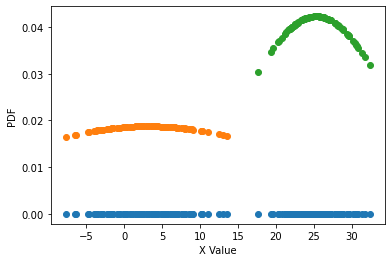

In [42]:
W_parameters = init_random_parameters(K=2, range_mean = [1,50], range_std = [1,10])

for i in range(20):
    print("Iteration number: %s"%i)
    print("Parameters values used: %s\n"%W_parameters)
    new_M = calculate_membership_dataset(X_allSamples,W_parameters)
    W_parameters = recalculate_parameters(X_allSamples,new_M)     

# Plot Data
y = np.zeros_like(X_allSamples)
plt.scatter(X_allSamples,y)
#plt.title('Plotting)
plt.xlabel('X Value')
plt.ylabel('PDF')

#Plot densities Functions
plt.scatter(X1_samples, norm.pdf(X1_samples, W_parameters[0,0], W_parameters[0,1]))
plt.scatter(X2_samples, norm.pdf(X2_samples, W_parameters[1,0], W_parameters[1,1]))      

plt.show()